In this file, we are going to test if the original reference from the raw data actually show any meaningful periodicity

In [35]:
cd

/home/luxx0489


In [36]:
# import packages
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from mne.io import read_raw_edf
from mne.viz import plot_evoked_topo, plot_evoked
from scipy.signal import welch,periodogram
from anlffr import spectral
from scipy.io import loadmat, savemat

#%matplotlib qt

In [37]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"
sub_id = 'Sub2'
raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR-5_MSK_LF.bdf',
                               stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
events = mne.find_events(raw)


Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub2/Sub2_TMR-5_MSK_LF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4911103  =      0.000 ...  1199.000 secs...
Trigger channel has a non-zero initial value of 65408 (consider using initial_event=True to detect this event)
1500 events found
Event IDs: [65409 65410]


In [38]:
epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=1)
epochs.load_data()
ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])
ep_a = epochs.copy().set_eeg_reference(ref_channels='average')

1500 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1500 events and 6145 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


In [39]:
data = epochs.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
x=data[:,:,:]
xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
xw = xw/abs(xw)
freq = np.fft.rfftfreq(x.shape[2],1/4096)
plv_1 = abs(xw.mean(0))


In [40]:
epochs.info['ch_names']

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B25',
 'B26',
 'B27',
 'B28',
 'B29',
 'B30',
 'B31',
 'B32',
 'EXG1',
 'EXG2',
 'Status']

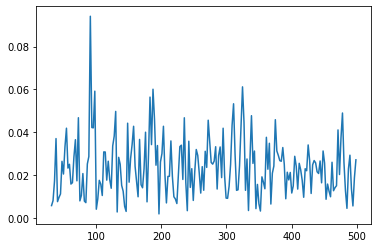

In [41]:
plt.plot(freq[passband],plv_1[65,passband])    


In [42]:
data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
x=data[:,:,:]
xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
xw = xw/abs(xw)
freq = np.fft.rfftfreq(x.shape[2],1/4096)
plv_1 = abs(xw.mean(0))


In [43]:
data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
x=data[:,:,:]
xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
xw = xw/abs(xw)
freq = np.fft.rfftfreq(x.shape[2],1/4096)
plv_2 = abs(xw.mean(0))


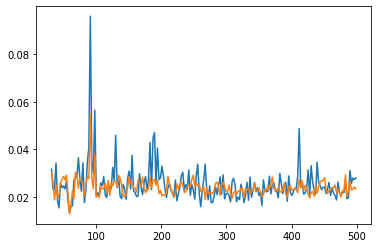

In [44]:
passband = np.logical_and(freq>30,freq<500)
plt.plot(freq[passband],plv_1[0:66,passband].mean(0))    
plt.plot(freq[passband],plv_2[0:66,passband].mean(0))  


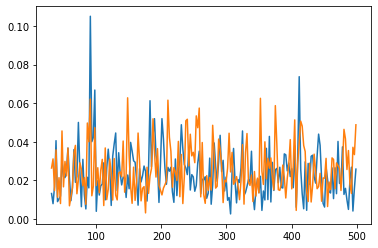

In [45]:
plt.plot(freq[passband],plv_2[65,passband])    
plt.plot(freq[passband],plv_2[37,passband])    

In [46]:
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"
sub_id = 'Sub2'
raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR-5_MSK_HF.bdf',
                               stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
events = mne.find_events(raw)


Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/Sub2/Sub2_TMR-5_MSK_HF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5255167  =      0.000 ...  1283.000 secs...


KeyboardInterrupt: 

In [ ]:
epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=1)
epochs.load_data()
ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])

In [ ]:
data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
x=data[:,:,:]
xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
xw = xw/abs(xw)
freq = np.fft.rfftfreq(x.shape[2],1/4096)


In [ ]:
passband = np.logical_and(freq>30,freq<1000)
plv_1 = abs(xw.mean(0))
plt.plot(freq[passband],plv_1.mean(0)[passband])    
